# 2019-2021 CAO data analysis
***
The Jupyter Notebook demostrates the process of obtaining CAO data between 2019 to 2021 from [CAO website](http://www.cao.ie/index.php?page=points&bb=mediastats), loading them to pandas dataframe, cleaning data and analyzing data. 

1. Save original data file 
2. Load CAO data (2019-2021) into dataframe
    - 2021: from website to csv file and dataframe
    - 2020: from excel to csv file and dataframe
    - 2019: from pdf to csv file and dataframe
3. Concatenate and join data of the 3 years into 1 dataframe
4. Analysis
    - Overview by year
    - Overall points (sum/average) + plots
    - courses that has raised points by year
    - 


In [1]:
# using Anaconda to install Camelot
#$ conda install -c conda-forge camelot-py

In [51]:
# request data from website for 2021 data
import requests as rq

# Data was in a particular pattern, extract using regular expression
import re 

# date time for file naming
import datetime as dt

# data frame
import pandas as pd

# numpy
import numpy as np

# downloading 2020 data
import urllib.request as urlrq

# convert pdf to csv/df for 2019 data
import camelot as cam 

# for filename matching for 2019 data
import glob

# for ploting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# get current date and time, for file path creation later
now = dt.datetime.now()

#format as a string
nowstr = now.strftime("%Y%m%d_%H%M%S")

## 2021 CAO data 
link to CAO 2021 data website : http://www2.cao.ie/points/l8.php <br/>
***
*Steps to turn data from online source to data frame:*
1. Get data from online source, then save as html with correct encoding
2. Extract relevant data using Regular Expression
3. Save extracted data as csv file then read in as data frame

Using Regular Expression to search and extract data, converting raw HTML to csv

In [4]:
# Get data from CAO website to notebook
points = rq.get("http://www2.cao.ie/points/l8.php")
points
# <Response [200]> means successfully getting the data

<Response [200]>

#### Saving original data set 
Using datatime string created earlier to name and identify files saved at different point of time

In [5]:
# create file path with date time to save the data 
pathHTML = "CAO2021\caoData2021_"+nowstr+".html"

In [6]:
# loop through the lines to have a look of the content
for line in points.iter_lines():
    print (line)

b'<html>'
b'<BODY>'
b'<a name="deg"><hr>'
b'<h3><center> Points Required for Entry to 2021 Level 8 Courses</h3></center><p>'
b'<A HREF="l76.php">Go to Level 7/6 List of Institutions.</a><p>'
b'<PRE><b>'
b'*     Not all on this points score were offered places.'
b'#     Test / Interview / Portfolio / Audition'
b'AQA   All qualified applicants'
b'v     New competition for available places'
b' '
b'</PRE>'
b'<dl>'
b'<p>'
b'<dt><a href="#ac8"><b>American College Dublin</b></a>'
b'<dt><a href="#al8"><b>Athlone Institute of Technology</b></a>'
b'<dt><a href="#by8"><b>IBAT College Dublin</b></a>'
b'<dt><a href="#cm8"><b>Marino Institute of Education</b></a>'
b'<dt><a href="#pc8"><b>Carlow College</b></a>'
b'<dt><a href="#ct8"><b>CCT College Dublin</b></a>'
b'<dt><a href="#cr8"><b>Cork Institute of Technology</b></a>'
b'<dt><a href="#db8"><b>Dublin Business School</b></a>'
b'<dt><a href="#dc8"><b>Dublin City University</b></a>'
b'<dt><a href="#dk8"><b>Dundalk Institute of Technology</b></a>'
b'

Before digging into extracting relevant data, we have to fix the decoding error first. <br/>
After some explorations, there is an error in decoding text. The server uses iso-8859-1 however it does not decode \x96, therefore we use standard cp1252 which is very similar but will decode \x96.

In [7]:
# change encoding to "cp1252"
original_encoding = points.encoding
points.encoding = 'cp1252'

In [8]:
# save the original html file
with open(pathHTML, "w") as f:
    f.write(points.text)

#### Extract relevant data
We will need to get rid of the html tags and extract only the course code, course name, points for round 1 and 2.

There seems to be a pattern to the data that we need, Using Regular Expression (Regex) to match the pattern.

In [9]:
# pattern of the data we want to extract
# course code consisting of 2 uppercase letters and 3 integers
regex = r'([A-Z]{2}[0-9]{3})(.*)'
# compile the regex to match the lines
re_course = re.compile(regex)

We will now move on to iterating all the lines in the html, with the correct encoding and extracting relevant data using regular expression. The extracted data will then be "split" and "join" into csv ready format and saved in a csv file. 

#### Save extracted data as csv file

In [10]:
# Save the file into csv using the path pattern
path2021 = "CAO2021\caoData2021_csv_" + nowstr + ".csv"

# Keep track of courses processed
no_lines = 0

# Open the csv file for writing
with open (path2021,"w") as f:
    # write head row, string join method, with commas separting the columns for csv
    f.write(','.join(['code','title','2021pointsR1','2021pointsR2'])+'\n')
    #loop through the lines
    for line in points.iter_lines():
        #decode the line using wrong encoding
        dline = line.decode("cp1252")
        #match lines that represent courses 
        if re_course.fullmatch(dline):
            #add 1 to line counter
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print total number of processes lines
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


#### Load into pandas dataframe

In [11]:
df2021 = pd.read_csv(path2021, encoding="cp1252")
df2021.head(50)

,code,title,2021pointsR1,2021pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
5,AL811,Civil Engineering,NaN,NaN
6,AL820,Mechanical and Polymer Engineering,327,NaN
7,AL830,General Nursing,451*,444
8,AL832,Mental Health Nursing,440*,431
9,AL835,Pharmacology,356,NaN


In [12]:
# Remove special character * and # from column "2021pointsR1"
courses21 = df2021
courses21['2021pointsR1']=df2021['2021pointsR1'].replace(regex=True, to_replace=r'[^0-9]', value=r'')
df2021.head(50)

,code,title,2021pointsR1,2021pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
5,AL811,Civil Engineering,NaN,NaN
6,AL820,Mechanical and Polymer Engineering,327,NaN
7,AL830,General Nursing,451,444
8,AL832,Mental Health Nursing,440,431
9,AL835,Pharmacology,356,NaN


In [13]:
# convert column "2021pointsR1" to float
courses21['2021pointsR1'] = df2021['2021pointsR1'].apply(pd.to_numeric, errors='coerce')
df2021['2021pointsR1'].dtypes

dtype('float64')

## 2020 data
CAO 2020 data is already in excel format.

In [14]:
url2020 = "http://www2.cao.ie/points/CAOPointsCharts2020.xlsx"

#### Save original File

In [15]:
# create file path
pathxlsx = 'CAO2020\cao2020_' + nowstr + '.xlsx'

In [16]:
urlrq.urlretrieve(url2020, pathxlsx)

('CAO2020\\cao2020_20211230_064335.xlsx',
 <http.client.HTTPMessage at 0x1fcbbdc7940>)

#### Load into pandas dataframe

In [17]:
# first 10 rows are preemble, don't need them in the data frame
df2020 = pd.read_excel(url2020, skiprows=10)
df2020.head(50)
df2020.dtypes

CATEGORY (i.e.ISCED description)     object
COURSE TITLE                         object
COURSE CODE2                         object
R1 POINTS                            object
R1 Random *                          object
R2 POINTS                            object
R2 Random*                           object
EOS                                  object
EOS Random *                         object
EOS Mid-point                        object
LEVEL                                 int64
HEI                                  object
Test/Interview #                     object
avp                                  object
v                                    object
Column1                             float64
Column2                             float64
Column3                             float64
Column4                             float64
Column5                             float64
Column6                             float64
Column7                             float64
Column8                         

In [18]:
# spot check
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [19]:
courses20 = df2020[["COURSE CODE2","R1 POINTS","R2 POINTS","EOS"]]
# set index name
courses20.columns=["code","2020pointsR1","2020pointsR2","2020EOS"]
courses20

,code,2020pointsR1,2020pointsR2,2020EOS
0,AC120,209,NaN,209
1,AC137,252,NaN,252
2,AD101,#+matric,NaN,#+matric
3,AD102,#+matric,NaN,#+matric
4,AD103,#+matric,NaN,#+matric
...,...,...,...,...
1459,WD208,188,NaN,188
1460,WD210,279,NaN,279
1461,WD211,271,NaN,271
1462,WD212,270,NaN,270


In [20]:
# Remove some special character like * and # in column "2021points_R1","2021EOS", 
courses20['2020pointsR1'].replace(regex=True, inplace=True, to_replace=r'[^0-9]', value=r'')
courses20['2020EOS'].replace(regex=True, inplace=True, to_replace=r'[^0-9]', value=r'')
courses20.head(50)

C:\Users\35383\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,code,2020pointsR1,2020pointsR2,2020EOS
0,AC120,209,NaN,209
1,AC137,252,NaN,252
2,AD101,,NaN,
3,AD102,,NaN,
4,AD103,,NaN,
5,AD202,,NaN,
6,AD204,,NaN,
7,AD211,,NaN,
8,AD212,,NaN,
9,AD215,377,320,320


In [21]:
# convert column "2021pointsR1" and "2020EOS" to float
courses20['2020pointsR1'] = courses20['2020pointsR1'].apply(pd.to_numeric, errors='coerce')
courses20['2020pointsR1'].dtypes
courses20['2020EOS'] = courses20['2020EOS'].apply(pd.to_numeric, errors='coerce')
courses20['2020EOS'].dtypes

<ipython-input-21-8c47a97f52b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses20['2020pointsR1'] = courses20['2020pointsR1'].apply(pd.to_numeric, errors='coerce')
<ipython-input-21-8c47a97f52b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses20['2020EOS'] = courses20['2020EOS'].apply(pd.to_numeric, errors='coerce')


dtype('float64')

In [22]:
# create a file path for pandas data
path2020 = "CAO2020\cao2020_" + nowstr + ".csv"

In [23]:
# save it.
courses20.to_csv(path2020)

## 2019 data

**Steps to turn data from pdf file to data frame**
1. Read in 2019 data which is in pdf format using Camelot
2. Check extraction accuracy
3. Concatenate the extracted tables into 1 dataframe
4. save the converted data into csv files

#### Save original file

In [24]:
url2019 = "http://www2.cao.ie/points/lvl8_19.pdf"

# create file path
pathpdf = 'CAO2019\cao2019_' + nowstr + '.pdf'

urlrq.urlretrieve(url2019, pathpdf)

('CAO2019\\cao2019_20211230_064335.pdf',
 <http.client.HTTPMessage at 0x1fcbc4e4ca0>)

#### Convert data from pdf format to pandas dataframe

In [45]:
# read in 2019 data from pdf using camelot
table2019 = cam.read_pdf(url2019, pages='all', flavor='lattice', split_text=True)

#### Save as csv files

The following code cell for exporting the data frame to csv files. The 18-page pdf file will be exported as a zip file with 18 csv files. The `compress` parameter compress them into 1 zip file. The data frame can also be exported as excel, html, json etc. 

In [26]:
# export the tables to 18 csv files inside a zip file (compressed) 
#table2019.export(CAO2019.csv", f="csv", compress=True)

Have a look of the tables extracted. 

In [27]:
# To see how many tables in the pdf
table2019
# camelot separted the table into 18 tables, as there were 18 pages

<TableList n=18>

In [28]:
# parsing report shows the accuracy of extraction
for i in range(18):
    print(table2019[i].parsing_report)

# data were most likely extracted correctly

{'accuracy': 99.61, 'whitespace': 3.41, 'order': 1, 'page': 1}
{'accuracy': 100.0, 'whitespace': 2.73, 'order': 1, 'page': 2}
{'accuracy': 100.0, 'whitespace': 2.27, 'order': 1, 'page': 3}
{'accuracy': 100.0, 'whitespace': 5.45, 'order': 1, 'page': 4}
{'accuracy': 100.0, 'whitespace': 1.82, 'order': 1, 'page': 5}
{'accuracy': 100.0, 'whitespace': 1.36, 'order': 1, 'page': 6}
{'accuracy': 100.0, 'whitespace': 3.18, 'order': 1, 'page': 7}
{'accuracy': 100.0, 'whitespace': 6.36, 'order': 1, 'page': 8}
{'accuracy': 97.92, 'whitespace': 5.45, 'order': 1, 'page': 9}
{'accuracy': 100.0, 'whitespace': 2.27, 'order': 1, 'page': 10}
{'accuracy': 100.0, 'whitespace': 2.73, 'order': 1, 'page': 11}
{'accuracy': 100.0, 'whitespace': 1.36, 'order': 1, 'page': 12}
{'accuracy': 100.0, 'whitespace': 1.36, 'order': 1, 'page': 13}
{'accuracy': 100.0, 'whitespace': 4.09, 'order': 1, 'page': 14}
{'accuracy': 100.0, 'whitespace': 1.36, 'order': 1, 'page': 15}
{'accuracy': 99.99, 'whitespace': 5.45, 'order': 

In [29]:
# turn the table to a pandas dataframe
# first page has 47 rows and 4 columns
table2019[0].df

,0,1,2,3
0,Course Code,INSTITUTION and COURSE,EOS,Mid
1,,Athlone Institute of Technology,,
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
5,AL805,Network Management and Cloud Infrastructure,329,442
6,AL810,Quantity Surveying,307,349
7,AL820,Mechanical and Polymer Engineering,300,358
8,AL830,General Nursing,410,429
9,AL832,Psychiatric Nursing,387,403


In [30]:
# concat all tables into 1 df
df_list = [table2019[0].df,table2019[1].df,table2019[2].df,table2019[3].df,table2019[4].df,
           table2019[5].df,table2019[6].df,table2019[7].df,table2019[8].df,table2019[9].df,
           table2019[10].df,table2019[11].df, table2019[12].df,table2019[13].df,table2019[14].df,
          table2019[15].df,table2019[16].df,table2019[17].df]

df2019 = pd.concat(df_list, axis=0, join="outer")
df2019

,0,1,2,3
0,Course Code,INSTITUTION and COURSE,EOS,Mid
1,,Athlone Institute of Technology,,
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
...,...,...,...,...
37,WD200,Arts (options),221,296
38,WD210,Software Systems Development,271,329
39,WD211,Creative Computing,275,322
40,WD212,Recreation and Sport Management,274,311


In [31]:
# drop the row indexed 0
df2019 = df2019.drop(df2019.index[0], axis=0)
# rename the index column, matching df of 2021 and 2020
df2019.columns=["code", "title", "2019EOS", "2019Mid-point"]
df2019

,code,title,2019EOS,2019Mid-point
1,,Athlone Institute of Technology,,
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
5,AL805,Network Management and Cloud Infrastructure,329,442
...,...,...,...,...
37,WD200,Arts (options),221,296
38,WD210,Software Systems Development,271,329
39,WD211,Creative Computing,275,322
40,WD212,Recreation and Sport Management,274,311


In [32]:
# drop the rows with only institutues name
df2019['code'].replace('', np.nan, inplace=True)
df2019.dropna(subset=['code'], inplace=True)
df2019

C:\Users\35383\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-32-ae7c6e20df61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019.dropna(subset=['code'], inplace=True)


,code,title,2019EOS,2019Mid-point
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
5,AL805,Network Management and Cloud Infrastructure,329,442
6,AL810,Quantity Surveying,307,349
...,...,...,...,...
37,WD200,Arts (options),221,296
38,WD210,Software Systems Development,271,329
39,WD211,Creative Computing,275,322
40,WD212,Recreation and Sport Management,274,311


In [33]:
courses19=df2019

In [34]:
# Remove some special character like * and # in column "2019EOS", 
courses19['2019EOS'].replace(regex=True, inplace=True, to_replace=r'[^0-9]', value=r'')
courses19.head(50)
courses19['2019EOS'].dtypes

C:\Users\35383\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


dtype('O')

In [35]:
# convert column "2019EOS" to float
courses19['2019EOS'] = courses19['2019EOS'].apply(pd.to_numeric, errors='coerce')
courses19['2019EOS'].dtypes

<ipython-input-35-6a35e85b6e9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses19['2019EOS'] = courses19['2019EOS'].apply(pd.to_numeric, errors='coerce')


dtype('float64')

In [36]:
# create a file path for pandas data
path2019 = "CAO2019\cao2019_" + nowstr + ".csv"

In [37]:
# save it.
courses19.to_csv(path2019)

## Join data of 2019-2021
Merge data of the 3 years on Course Code[[1]](https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html), as it is understood to be an unique identifier for each course, and dropping those courses which were not offered in all of the 3 years for the purpose of comparison. 

In [38]:
# merge data of 2021 and 2020 on "code"
courses_2yrs = pd.merge(courses21, courses20, how="left", on="code")
#merge data of 2019 to courses_2yrs on "code"
courses_3yrs = pd.merge(courses_2yrs, courses19, how="left", on="code")
courses_3yrs

,code,title_x,2021pointsR1,2021pointsR2,2020pointsR1,2020pointsR2,2020EOS,title_y,2019EOS,2019Mid-point
0,AL801,Software Design for Virtual Reality and Gaming,300.0,NaN,303.0,NaN,303.0,Software Design with Virtual Reality and Gaming,304.0,328
1,AL802,Software Design in Artificial Intelligence for...,313.0,NaN,332.0,NaN,332.0,Software Design with Cloud Computing,301.0,306
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,NaN,337.0,NaN,337.0,Software Design with Mobile Apps and Connected...,309.0,337
3,AL805,Computer Engineering for Network Infrastructure,321.0,NaN,333.0,NaN,333.0,Network Management and Cloud Infrastructure,329.0,442
4,AL810,Quantity Surveying,328.0,NaN,319.0,NaN,326.0,Quantity Surveying,307.0,349
...,...,...,...,...,...,...,...,...,...,...
944,WD211,Creative Computing,270.0,NaN,271.0,NaN,271.0,Creative Computing,275.0,322
945,WD212,Recreation and Sport Management,262.0,NaN,270.0,NaN,270.0,Recreation and Sport Management,274.0,311
946,WD230,Mechanical and Manufacturing Engineering,230.0,230,253.0,NaN,253.0,Mechanical and Manufacturing Engineering,273.0,348
947,WD231,Early Childhood Care and Education,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# set title_x as course title
courses_3yrs.columns=["code","course title", "2021pointsR1","2021pointsR2","2020pointsR1","2020pointsR2","2020EOS","title","2019EOS","2019Mid-point"]

In [40]:
# drop column
courses_3yrs = courses_3yrs.drop(columns="title", axis=1)
courses_3yrs

,code,course title,2021pointsR1,2021pointsR2,2020pointsR1,2020pointsR2,2020EOS,2019EOS,2019Mid-point
0,AL801,Software Design for Virtual Reality and Gaming,300.0,NaN,303.0,NaN,303.0,304.0,328
1,AL802,Software Design in Artificial Intelligence for...,313.0,NaN,332.0,NaN,332.0,301.0,306
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,NaN,337.0,NaN,337.0,309.0,337
3,AL805,Computer Engineering for Network Infrastructure,321.0,NaN,333.0,NaN,333.0,329.0,442
4,AL810,Quantity Surveying,328.0,NaN,319.0,NaN,326.0,307.0,349
...,...,...,...,...,...,...,...,...,...
944,WD211,Creative Computing,270.0,NaN,271.0,NaN,271.0,275.0,322
945,WD212,Recreation and Sport Management,262.0,NaN,270.0,NaN,270.0,274.0,311
946,WD230,Mechanical and Manufacturing Engineering,230.0,230,253.0,NaN,253.0,273.0,348
947,WD231,Early Childhood Care and Education,266.0,NaN,NaN,NaN,NaN,NaN,NaN


# Analysis
***

### 1. Descriptive statistics
Describe and summary plots of 3 years of data
- max, min, mean, std points
- course with highest and lowest points
- rise in points
- drop in points
plots
- course count@yr
- average score @yr

In [41]:
courses_3yrs.describe(include="all") 

,code,course title,2021pointsR1,2021pointsR2,2020pointsR1,2020pointsR2,2020EOS,2019EOS,2019Mid-point
count,949,949,923.000000,258,862.000000,189.0,866.000000,720.000000,742
unique,949,709,NaN,180,NaN,136.0,NaN,NaN,248
top,DC294,Business,NaN,613*,NaN,509.0,NaN,NaN,543
freq,1,12,NaN,5,NaN,4.0,NaN,NaN,14
mean,NaN,NaN,407.666306,NaN,388.875870,NaN,386.319861,377.241667,NaN
std,NaN,NaN,128.706224,NaN,121.035945,NaN,123.937148,118.526078,NaN
min,NaN,NaN,57.000000,NaN,55.000000,NaN,55.000000,55.000000,NaN
25%,NaN,NaN,303.000000,NaN,300.000000,NaN,300.000000,298.000000,NaN
50%,NaN,NaN,391.000000,NaN,367.500000,NaN,366.500000,352.000000,NaN
75%,NaN,NaN,499.000000,NaN,465.000000,NaN,464.500000,443.250000,NaN


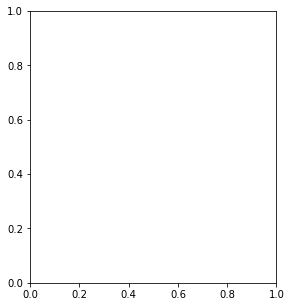

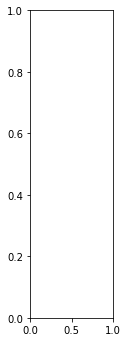

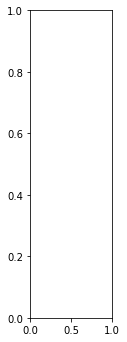

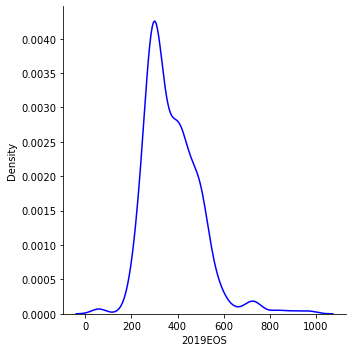

In [97]:
# plot counts of course of each year (using df instead of courses)

# 3 subplots showing distribution of points for 3 years
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.displot(courses_3yrs['2021pointsR1'],kind="kde",color='r')
plt.subplot(132)
sns.displot(courses_3yrs['2020pointsR1'],kind="kde",color='g')
plt.subplot(133)
sns.displot(courses_3yrs['2019EOS'],kind="kde",color='b')
#df2021.hist(column="2021pointsR1", color="r")
#df

<AxesSubplot:ylabel='Frequency'>

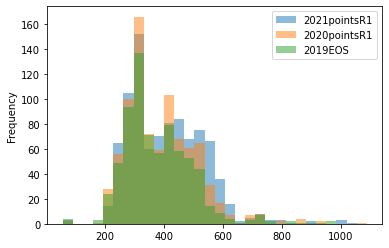

In [98]:
courses_3yrs[['2021pointsR1','2020pointsR1','2019EOS']].plot(kind='hist',bins=30,alpha=0.5)

In [46]:
# create columns to show difference in points among 3 years of each course
courses_3yrs['21n20diff']= courses_3yrs['2021pointsR1']-courses_3yrs['2020pointsR1']
courses_3yrs['20n19diff']= courses_3yrs['2020EOS']-courses_3yrs['2019EOS']
courses_3yrs['21n19diff']= courses_3yrs['2021pointsR1']-courses_3yrs['2019EOS']
courses_3yrs.head()

,code,course title,2021pointsR1,2021pointsR2,2020pointsR1,2020pointsR2,2020EOS,2019EOS,2019Mid-point,21n20diff,20n19diff,21n19diff
0,AL801,Software Design for Virtual Reality and Gaming,300.0,NaN,303.0,NaN,303.0,304.0,328,-3.0,-1.0,-4.0
1,AL802,Software Design in Artificial Intelligence for...,313.0,NaN,332.0,NaN,332.0,301.0,306,-19.0,31.0,12.0
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,NaN,337.0,NaN,337.0,309.0,337,13.0,28.0,41.0
3,AL805,Computer Engineering for Network Infrastructure,321.0,NaN,333.0,NaN,333.0,329.0,442,-12.0,4.0,-8.0
4,AL810,Quantity Surveying,328.0,NaN,319.0,NaN,326.0,307.0,349,9.0,19.0,21.0


In [59]:
meanDiffList = [courses_3yrs['21n20diff'].mean(),courses_3yrs['21n19diff'].mean(),courses_3yrs['20n19diff'].mean()]
meanDiffList

[18.48651817116061, 32.722535211267605, 12.956152758132957]

In [49]:
courses_3yrs['21n19diff'].mean()

32.722535211267605

In [50]:
courses_3yrs['20n19diff'].mean()

12.956152758132957

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([12.95615276, 14.932791  , 16.90942925, 18.88606749, 20.86270574,
        22.83934398, 24.81598223, 26.79262048, 28.76925872, 30.74589697,
        32.72253521]),
 <BarContainer object of 10 artists>)

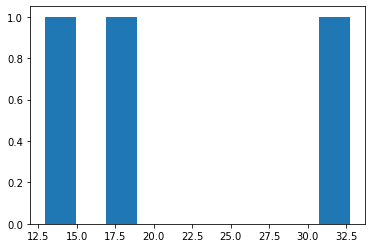

In [95]:
# plot mean differenence in points among 3 years


Create plots and visualizations

In [ ]:
# line plot for rise in points

References:
[1]
[2]

reference: <br>
https://www.analyticsvidhya.com/blog/2020/08/how-to-extract-tabular-data-from-pdf-document-using-camelot-in-python/
https://camelot-py.readthedocs.io/en/master/user/quickstart.html
